# Data Analysis Tools: Python and Jupyter

This is a **[Jupyter Notebook](http://jupyter.org/)**, a browser-based interface that works with [a vide variety of programming languages](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels). It's great for playing around with data, taking notes and making plots. If used properly, the notebook can be included directly as [a supplement to your manuscript](https://losc.ligo.org/s/events/GW150914/LOSC_Event_tutorial_GW150914.html), making all your data processing transparrent and reproducible!

Jupyter allows you to keep all your notes, code and plots in one place. The workspace is divided into 'cells', which can be either 'Markdown' (like this one, for taking notes) or 'Code'.

## The main idea:

![Not Like this!](./not_like_this.png)

## For Example, in Python:

In [1]:
# first, import a few useful packages
import numpy as np  # the 'numerical python' package
import pandas as pd  # a 'spreadsheet' type library for data handling

import matplotlib.pyplot as plt  # for plotting

# tell plots to display inline
%matplotlib inline

plt.rcParams['figure.dpi'] = 100

### Read in some data

In [2]:
df = pd.read_excel('data.xls')

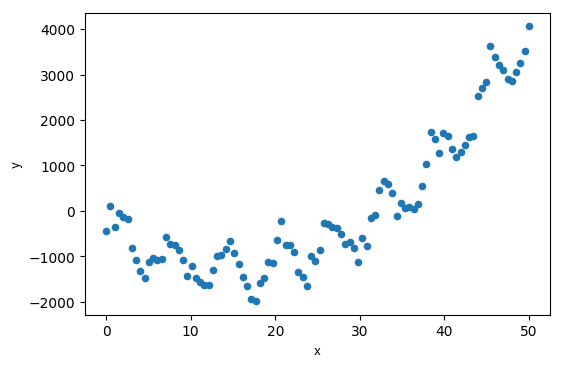

In [3]:
ax = df.plot(x='x', y='y', kind='scatter')

Looks like a periodic function with an underlying polynomial trend...

### Fitting Data

There are heaps of ways to fit models to data in Python. This examples uses the `scipy` (**Sci**entific **Py**thon) package, but other notable tools include:
- `statsmodels` (general statistics)
- `sklearn` (machine-learning)
- `PyMC3` (**Py**thon **M**onte **C**arlo)
- `ggplot2` (plotting and basic model fitting).

In [4]:
from scipy.optimize import curve_fit

Define a function that we want to fit:

$ y = S sin(x) + p_0 + p_1 x + p_2 x^2$

In [5]:
def fitfn(x, s, p0, p1, p2):
    return s * np.sin(x) + p0 + p1 * x + p2 * x**2

Fit the model!

In [6]:
p, cov = curve_fit(fitfn, df.x, df.y)

Plot the results

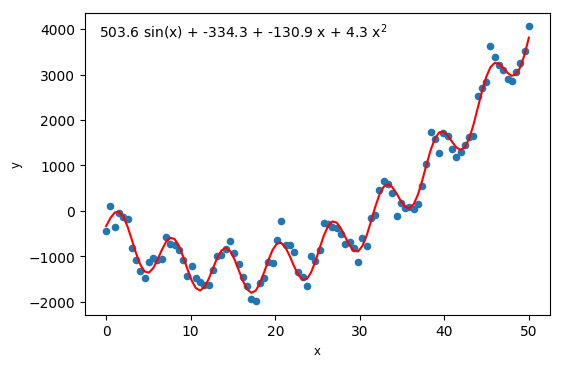

In [7]:
# let's see how well it's done
ax = df.plot(x='x', y='y', kind='scatter')

pred = fitfn(df.x, *p)
ax.plot(df.x, pred, c='r')

plt.text(.03, .97, '{:.1f} sin(x) + {:.1f} + {:.1f} x + {:.1f} $x^2$'.format(*p),
         va='top', ha='left', transform=ax.transAxes)  # write the fit equation on the plot


### Residuals

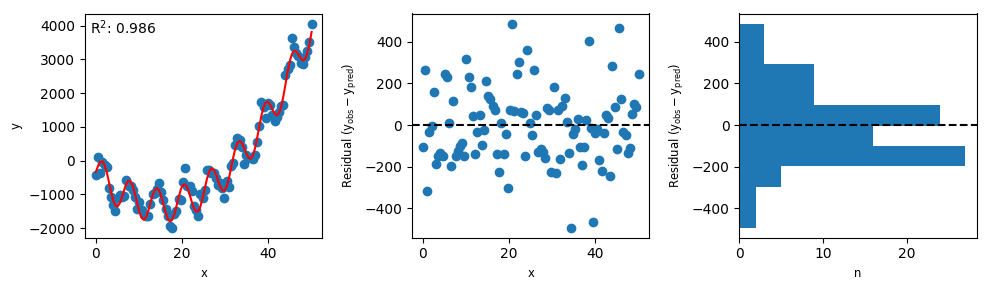

In [8]:
yr = df.y - pred

fig, (fax, rax, hax) = plt.subplots(1, 3, figsize=[10,3])

fax.scatter(df.x, df.y)
fax.plot(df.x, pred, c='r')
fax.set_ylabel('y')
fax.set_xlabel('x')

rax.scatter(df.x, yr)
rax.set_xlabel('x')

hax.hist(yr, orientation='horizontal')
hax.set_xlabel('n')

for ax in [rax, hax]:
    ax.axhline(0, c='k', ls='dashed')
    ax.set_ylabel('Residual ($y_{obs} - y_{pred}$)')

    
# goodness of fit
SStot = np.sum((df.y - df.y.mean())**2)
SSreg = np.sum(yr**2)
    
R2 = 1 - (SSreg / SStot)

fax.text(.02, .98, '$R^2$: {:.3f}'.format(R2), va='top', ha='left', transform=fax.transAxes)

fig.tight_layout()

## Want to try this at home?

### Complete Beginner
If you're completely new to Python, the easiest way in is to download and install a pre-packaged version that contains everything you need and will 'just work', like Continuum Analytics '[Anaconda](https://www.anaconda.com/download/)'. Go to that link, and download the Python 3.6 version. It even comes with a [graphical interface](https://docs.anaconda.com/anaconda/navigator/) to start Jupyter and other Python apps.


### Experienced Python-er
If you're already comfortable in python and have your own setup, 

    pip install jupyter

should install everything you need. To start the notebook run `jupyter notebook` in a terminal.